In [1]:
%pylab inline

from rayopt import *

Populating the interactive namespace from numpy and matplotlib


/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:299: RuntimeWarning: divide by zero encountered in double_scalars
  yield "petzval radius: %.5g" % (1/self.petzval_curvature)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:245: RuntimeWarning: divide by zero encountered in true_divide
  return self.n.take((0, -2))/(2*na)
/home/rj/work/nist/pyrayopt/rayopt/paraxial_trace.py:250: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.wavelength/(2*na)/self.system.scale
/home/rj/work/nist/pyrayopt/rayopt/elements.py:208: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/home/rj/.local/lib/python3.5/site-packages/numpy/core/function_base.py:107: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/rj/work/nist/pyrayopt/rayopt/analysis.py:379: RuntimeWarning: invalid value encountered in true_divide
  xd = (a[1] - h)/h
/usr/lib/python3/dist-packages/matplotlib/collections.py:631: F

System: Hubble Space Telescope f/24
Scale: 1.0 mm
Wavelengths: 633 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 0.0278°
 Pupil:
   Pupil Distance: 5000
   Radius: 1200
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -7002.52
   Update Radius: True
   Radius: -145.889
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf       2400      basic/vacuum   1.000   1.000     inf
 1 S       5000 -1.104e+04       2400      basic/mirror   1.000   1.000     inf
 2 S     4906.1       1358        300      basic/mirror   1.000   1.000     inf
 3 S     6406.3       -640        inf              None     nan     nan     nan

lagrange: -0.58178
track length: -4906.1
object, image height: [  2.42406869  27.92469742]
petzval radius: inf
front, back focal length (from PP): [-57598.96729776  57598.96729776]
entry, exit pupil height: [ 1200.           145.88889812]
entry, exit pupil distance: [  -0.         -596.45119848]

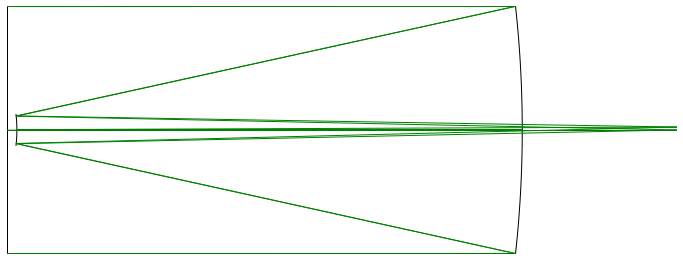

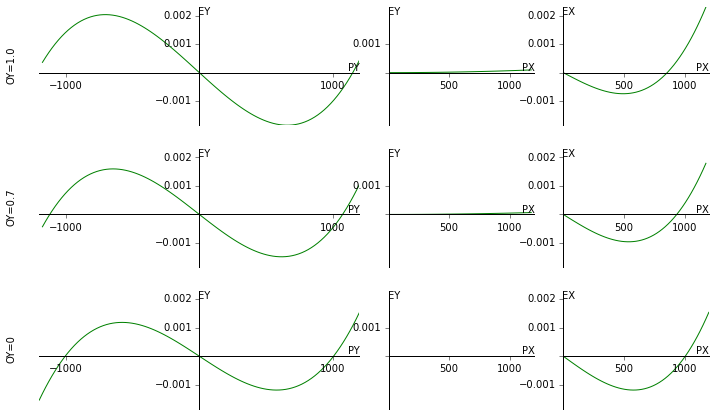

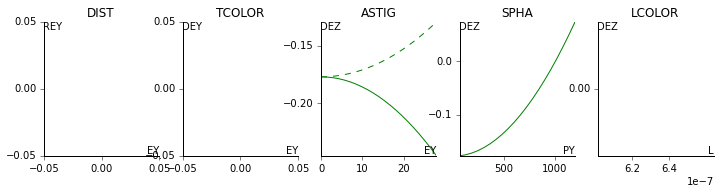

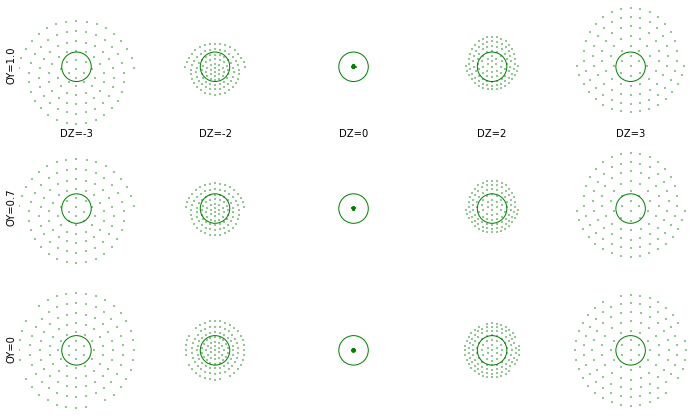

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


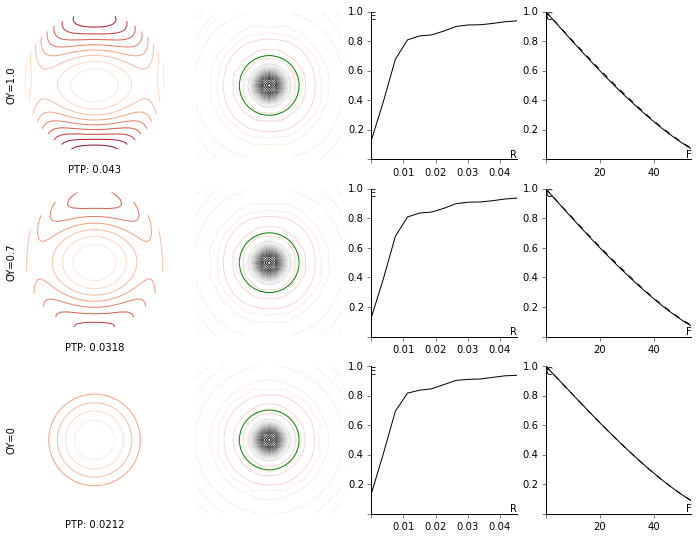

In [2]:
s = System(description="Hubble Space Telescope f/24")
s.wavelengths = [632.8e-9]
s.object = InfiniteConjugate(angle_deg=100/60**2, pupil=dict(radius=1200))
s.fields = 0, .7, 1.
start = Spheroid(radius=1200., material=vacuum)
m1 = Spheroid(roc=-11040., conic=-1.002299, radius=1200.,
              distance=5e3, material=mirror)
# as built:
# m1.conic = -1.0013236
m2 = Spheroid(roc=1358., conic=-1.496, radius=150.,
              distance=-4906.072, material=mirror)
end = Spheroid(distance=1500 + m2.distance)
end.curvature = -1/640.
s.extend([start, m1, m2, end])
s.update()

Analysis(s)